In [131]:
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt


In [2]:
json_data_year_2015 = "data/data_year_2015.json"
json_raw_data_year_2015 = "data/raw_data_year_2015.json"

In [279]:
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        json_content = json.load(file)
    return json_content


def convert_timestamp(timestamp):
    # Divide by 1000 to convert milliseconds to seconds
    timestamp_seconds = timestamp / 1000

    # Create a datetime object from the timestamp
    dt = datetime.datetime.fromtimestamp(timestamp_seconds)

    # Format the datetime as a string
    formatted_time = dt.strftime('%Y-%m-%d %H:%M:%S')

    return formatted_time

In [4]:
data_2015 = read_json_file(json_data_year_2015)

In [149]:
# UNITS PROBABLY IN MW
data_2015[0]["y0AxisLabel"]

[{'en': 'Power (MW)',
  'de': 'Leistung (MW)',
  'fr': 'Puissance (MW)',
  'es': 'Potencia (MW)',
  'it': 'Prestazione (MW)'}]

In [150]:
data_2015[0]["xAxisValues"]

[1420066800000,
 1420067700000,
 1420068600000,
 1420069500000,
 1420070400000,
 1420071300000,
 1420072200000,
 1420073100000,
 1420074000000,
 1420074900000,
 1420075800000,
 1420076700000,
 1420077600000,
 1420078500000,
 1420079400000,
 1420080300000,
 1420081200000,
 1420082100000,
 1420083000000,
 1420083900000,
 1420084800000,
 1420085700000,
 1420086600000,
 1420087500000,
 1420088400000,
 1420089300000,
 1420090200000,
 1420091100000,
 1420092000000,
 1420092900000,
 1420093800000,
 1420094700000,
 1420095600000,
 1420096500000,
 1420097400000,
 1420098300000,
 1420099200000,
 1420100100000,
 1420101000000,
 1420101900000,
 1420102800000,
 1420103700000,
 1420104600000,
 1420105500000,
 1420106400000,
 1420107300000,
 1420108200000,
 1420109100000,
 1420110000000,
 1420110900000,
 1420111800000,
 1420112700000,
 1420113600000,
 1420114500000,
 1420115400000,
 1420116300000,
 1420117200000,
 1420118100000,
 1420119000000,
 1420119900000,
 1420120800000,
 1420121700000,
 1420122

In [28]:
#########################################
# Datasteps seem to be every 15 minutes!!
#########################################

In [8]:
len(data_2015[0]["data"])

35040

In [151]:
timestamps = data_2015[0]["xAxisValues"]

In [152]:
data_2015[0]["xAxisFormat"]

'unixTime'

In [153]:
convert_timestamp(timestamps[0])

'2015-01-01 00:00:00'

In [154]:
convert_timestamp(timestamps[1])

'2015-01-01 00:15:00'

In [13]:
####

In [19]:
len(data_2015[2]["data"])

35040

In [60]:
######################
# Get coal data
# x = timestampt
# y = coal mw

# Brown + Hard coal are seperate 
# What is Gas coal?

In [318]:
def find_brown_and_hard_coal(values_for_year, search_terms=["Braunkohle", "Steinkohle"]):
    coal_lists = []
    for source in values_for_year:
        for term in search_terms:
            try:
                if term in source["name"]["de"]:
                    coal_lists.append(source)
            except TypeError:
                pass
            
    return coal_lists

In [319]:
def get_daily_timestamps(timestamps):
    daily_timestamps = timestamps[::4][::24]
    return daily_timestamps
    

In [227]:
def get_daily_electricity_consumption(energy_consumption_data):
    daily_electricity_production = []
    hourly_energy_production = energy_consumption_data[::4]
    daily_sum = 0

    for i in range(0, len(hourly_energy_production), 24):
        step_sum = sum(hourly_energy_production[i:i+24])
        daily_electricity_production.append(step_sum)
        
    
    return daily_electricity_production

In [271]:
def aggregate_energy_types(energy_1, energy_2):
    return [x + y for x, y in zip(energy_1, energy_2)]

In [306]:
def get_aggreagted_coal_data(data_set):
    coal_sources = find_brown_and_hard_coal(data_set)

    quarter_hour_timestamps = data_set[0]["xAxisValues"]
    daily_timestamps = get_daily_timestamps(quarter_hour_timestamps)
    daily_datetime_timestamps = [convert_timestamp(stamp) for stamp in daily_timestamps]

    quarter_hour_coal = aggregate_energy_types(coal_sources[0]["data"], coal_sources[1]["data"])
    daily_coal = get_daily_electricity_consumption(quarter_hour_coal)
    return daily_coal, daily_datetime_timestamps

In [280]:
coal_sources = find_brown_and_hard_coal(data_2015)

quarter_hour_timestamps = data_2015[0]["xAxisValues"]
daily_timestamps = get_daily_timestamps(quarter_hour_timestamps)
daily_datetime_timestamps = [convert_timestamp(stamp) for stamp in daily_timestamps]

quarter_hour_coal = aggregate_energy_types(coal_sources[0]["data"], coal_sources[1]["data"])
daily_coal = get_daily_electricity_consumption(quarter_hour_coal)

In [259]:
year_2015_braunkohle = sum(agg_braunkohle) / 1000000
year_2015_steinkohle = sum(agg_steinkohle) / 1000000
print(year_2015_braunkohle, year_2015_steinkohle)
print(year_2015_braunkohle + year_2015_steinkohle)

139.37538070000045 106.19207109999992
245.56745180000036


Braunkohlekraftwerke produzierten ca. 139 TWh netto.
Nettoproduktion aus Steinkohlekraftwerken betrug 104 TWh
LINK: https://www.ise.fraunhofer.de/de/presse-und-medien/news/2016/stromerzeugung-in-deutschland-erneuerbare-energien-erreichten-2015-einen-anteil-von-rund-35-prozent.html

Braunkohle [150 TWh], aber noch vor der Steinkohle [110 TWh]
LINK: https://www.sonnenseite.com/de/energie/strommix-2015-stromerzeugung-nach-energietraegern/

In [344]:
def plot_coal_data(timestamps, coal_list):
    plt.plot(timestamps, coal_list)
    plt.xlabel('Timestamp')
    plt.ylabel('MWh Kohle')
    plt.title('Coal Data Plot')
    plt.show()

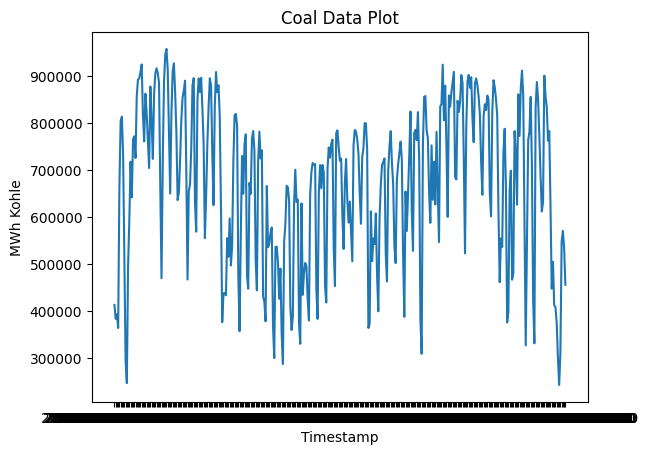

In [281]:
plot_coal_data(daily_datetime_timestamps, daily_coal)

In [337]:
# Open data JSON

In [338]:
coal_data_2022 = read_json_file("coal_data_2022.json")

In [340]:
coal_data_2022.keys()

dict_keys(['time', 'data'])

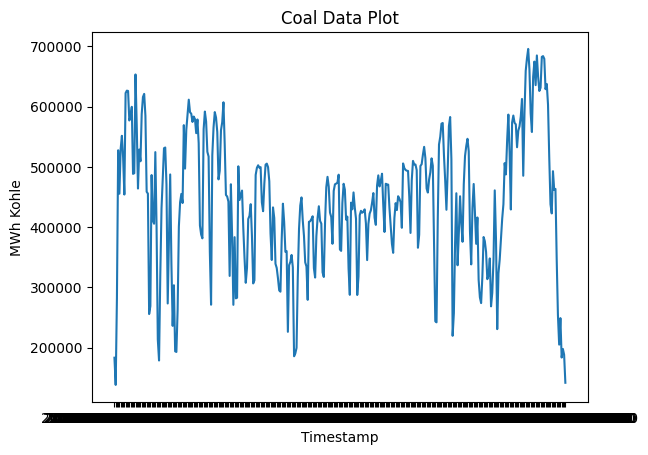

In [345]:
plot_coal_data(coal_data_2022["time"], coal_data_2022["data"])

In [353]:
import os
matching_files = []
for filename in os.listdir("data/"):
    if filename.startswith("data_year_") and filename.endswith(".json"):
        matching_files.append(filename)

In [355]:
sorted(matching_files)

['data_year_2015.json',
 'data_year_2016.json',
 'data_year_2017.json',
 'data_year_2018.json',
 'data_year_2019.json',
 'data_year_2020.json',
 'data_year_2021.json',
 'data_year_2022.json',
 'data_year_2023.json']

In [352]:
matching_files

['data_year_2015.json',
 'data_year_2016.json',
 'data_year_2017.json',
 'data_year_2018.json',
 'data_year_2019.json',
 'data_year_2020.json',
 'data_year_2021.json',
 'data_year_2022.json',
 'data_year_2023.json']

In [298]:
year_2022_json_file = "data/data_year_2022.json"
year_2022 = read_json_file(year_2022)

In [336]:
sum(year_2022[6]["data"][::4])

55428990.500000045

In [331]:
sum(year_2022[5]["data"][::4])

105943700.30000041

In [320]:
daily_coal_2022, daily_timestamps_2022 = get_aggreagted_coal_data(year_2022)

169,9 TWh

LINK: https://www.destatis.de/DE/Presse/Pressemitteilungen/2023/03/PD23_090_43312.html

Burttostromerzeugung: 180,6 Stein + Braunkohle

LINK: https://www.destatis.de/DE/Themen/Branchen-Unternehmen/Energie/Erzeugung/Tabellen/bruttostromerzeugung.html